Some Data Loading/Validating/Cleaning Basics (iPython Notebook)
=======================================================

In [1]:
# load most relevant packages: NumPy, Pandas and some plotting libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Task Data

Load the `02_task_data.csv` dataset (data description in task_data_description.txt).

In [2]:
# display content of the cufrent directory (use "ls" on Unix based systems!)
#!dir

In [3]:
# display content of txt file (use "cat" on Unix based systems!)
!type 02_task_data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
# Unix only: show header of the CSV file
#!head 02_task_data.csv

In [5]:
df = pd.read_csv('02_task_data.csv', index_col='Id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## Data Types and Measurement Scales

Select at least 2 features with nominal scale, 1 with dichotomous scale, 2 with ordinal scale, 2 with discrete numeric scale, and 2 with numeric continuous scale.

### Nominal Scale

1. Neighborhood: Physical locations within Ames city limits
    - Blmngtn Bloomington Heights
    - Blueste Bluestem
    - BrDale Briardale
    - BrkSide Brookside
    - ClearCr Clear Creek
    - CollgCr College Creek
    - Crawfor Crawford
    - Edwards Edwards
    - Gilbert Gilbert
    - IDOTRR Iowa DOT and Rail Road
    - MeadowV Meadow Village
    - Mitchel Mitchell
    - Names North Ames
    - NoRidge Northridge
    - NPkVill Northpark Villa
    - NridgHt Northridge Heights
    - NWAmes Northwest Ames
    - OldTown Old Town
    - SWISU South & West of Iowa State University
    - Sawyer Sawyer
    - SawyerW Sawyer West
    - Somerst Somerset
    - StoneBr Stone Brook
    - Timber Timberland
    - Veenker Veenker
2. MSZoning: Identifies the general zoning classification of the sale.
    - A Agriculture
    - C Commercial
    - FV Floating Village Residential
    - I Industrial
    - RH Residential High Density
    - RL Residential Low Density
    - RP Residential Low Density Park
    - RM Residential Medium Density

### Dichotomous Scale

1. CentralAir: Central air conditioning
    - N No
    - Y Yes

### Ordinal Scale

1. LotShape: General shape of property
    - Reg Regular
    - IR1 Slightly irregular
    - IR2 Moderately Irregular
    - IR3 Irregular
2. Utilities: Type of utilities available
    - AllPub All public Utilities (E,G,W,& S)	
    - NoSewr Electricity, Gas, and Water (Septic Tank)
    - NoSeWa Electricity and Gas Only
    - ELO Electricity only

### Discrete Numeric Scale

1. Fireplaces: Number of fireplaces
2. YearBuilt: Original construction date

### Numeric Continuous Scale

1. LotFrontage: Linear feet of street connected to property
2. LotArea: Lot size in square feet

## Domains Validation

Validate domains of all features selected in previous step.

In [7]:
features = ['Neighborhood', 'MSZoning', 'CentralAir', 'LotShape', 'Utilities', 'Fireplaces',
            'YearBuilt', 'LotFrontage', 'LotArea']

In [8]:
for feature in features:
    print(feature, df[feature].unique())

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
CentralAir ['Y' 'N']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Utilities ['AllPub' 'NoSeWa']
Fireplaces [0 1 2 3]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
LotFrontage [ 

All values follow the data description file.
There are only minor but consistent differences.
For example 'C' in data description is 'C (all)' in data.
Also some cases differ e.g. 'NAmes' vs. 'Names'.

In [9]:
for feature in ['YearBuilt', 'LotFrontage', 'LotArea']:
    print(df[feature].describe(), '\n')

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 



Numerical values are also in valid domains.

## Format Conversion

Convert them to proper format.

In [11]:
df['Neighborhood'] = df['Neighborhood'].astype('category', ordered=True)
df['MSZoning'] = df['MSZoning'].astype('category', ordered=True)
df['CentralAir'] = df['CentralAir'].astype('category', ordered=True)
df['LotShape'] = df['LotShape'].astype('category', ordered=True, categories=['Reg', 'IR1', 'IR2', 'IR3'])
df['Utilities'] = df['Utilities'].astype('category', ordered=True, categories=['AllPub', 'NoSewr', 'NoSeWa', 'ELO'])
df['LotArea'] = df['LotArea'].astype('float64')

In [12]:
df[features].dtypes

Neighborhood    category
MSZoning        category
CentralAir      category
LotShape        category
Utilities       category
Fireplaces         int64
YearBuilt          int64
LotFrontage      float64
LotArea          float64
dtype: object

## Outliers Detection

Try to detect some outliers (use GrLivArea and SalePrice).

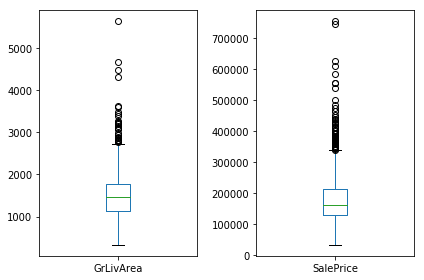

In [15]:
# look at the boxplots of both variables (dispersion of data)
fig, (ax1, ax2) = plt.subplots(ncols=2)
df['GrLivArea'].plot.box(ax=ax1)
df['SalePrice'].plot.box(ax=ax2)
fig.tight_layout()

How to interprete a boxplot?
* min/max values
* median, 2nd quartile (25%), 3rd quartile (75%)
* whiskers are at +/-1.5 of the IQR (interquartile range) - everything outside this is an outlier

In [16]:
# draw a scatterplot
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)

Plot of two variables; useful for examining/visualizing dependencies between these variables

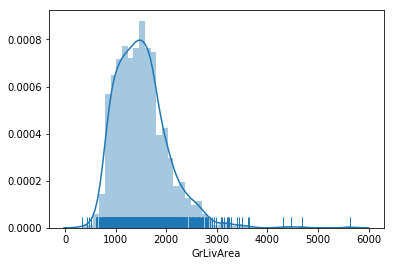

In [17]:
# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit (for live area)
sns.distplot(df['GrLivArea'], rug=True)

In [18]:
# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit (for sale price)
sns.distplot(df['SalePrice'], rug=True)

In [19]:
df[df['SalePrice'] > 700000]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
692           60       RL        104.0  21535.0   Pave   NaN      IR1   
1183          60       RL        160.0  15623.0   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
692          Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1183         Lvl    AllPub    Corner  ...      555     Ex  MnPrv         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
692        0      1    2007        WD         Normal     755000  
1183       0      7    2007        WD        Abnorml     745000  

[2 rows x 80 columns]

I detected the four samples below as outliers. Because they have much higher GrLivArea
(Above grade (ground) living area square feet).
Two of them are abnormally expesive and the other two were sold when not fully completed.

On the other hand. The two with high sale price follow the trend which shows the scatter plot.
Correlation between GrLivArea and SalePrice is 0.71 (shown in the scatter plot).
And if the two other were sold when completed they might be expensive.

In [20]:
with pd.option_context('display.max_columns', None):
    print(df[df['GrLivArea'] > 4000])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
524           60       RL        130.0  40094.0   Pave   NaN      IR1   
692           60       RL        104.0  21535.0   Pave   NaN      IR1   
1183          60       RL        160.0  15623.0   Pave   NaN      IR1   
1299          60       RL        313.0  63887.0   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
524          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
692          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1183         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1299         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                      

## Missing Data

Determine all features with missing data.
Find a feature that should be completely droped from further analysis.
Select a feature with reasonable small portion of missing values (but with at least 5) and try to fill it properly.

In [21]:
# features with missing data
fearutres_with_nan = df.columns[df.isnull().any()].tolist()
print('Number of samples:', df.shape[0])
df[fearutres_with_nan].isnull().sum().sort_values(ascending=False)

Number of samples: 1460


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Dropped Feature

Feature that should be completely droped from further analysis: LotFrontage (Linear feet of street connected to property)

It might seem that PoolQC, MiscFeature, Alley, Fence, FireplaceQu features have more missing values but in these cases missing values ussualy mean that the feature is not available (e.g. Fence is not available).

In [22]:
del df['LotFrontage']

### Filling `MasVnrType` Feature

In [23]:
# apply operation to all rows of a column (here: multiply by 100)
df['MasVnrType'].value_counts(normalize=True).mul(100)

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

As almost 60% of MasVnrType is of value None it's reasonable to claim that the missing values might be set to None. Then MasVnrArea might be also set to 0.

In [21]:
df.loc[df['MasVnrType'].isnull(), ['MasVnrType', 'MasVnrArea']] = ('None', 0)
df[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

### Exercise 2:
#### (1) Load the data-set '02_dow_jones_index.data' using pandas ('02_dow_jones_index.names' contains a description of the data).
#### (2) Validate the numerical columns in the following ways: (a) list all values of the columns with non-numerical values and their occurrences (use a dictionary); (b) convert share prices to floats (spoiler alert: df\['open'\] = df\['open'\].str.strip('$').astype('float64') ); (c) look at the dispersion of the columns with numerical values (7-number-summary and/or boxplot)
#### (3) Check if all rows are in the proper chronological order and fix the order if necessary. Correct the date (spoiler alert: df\['date_corr'\] = pd.to_datetime(df\['date'\]) ) and plot the chart of the closing stock price for the Cisco share.
#### (4) Add a column with the absolute difference between highest and lowest stock price of this day.